In [ ]:
# Verificando se o pacote está instalado
%pip show pycaret

Name: pycaret
Version: 3.3.2
Summary: PyCaret - An open source, low-code machine learning library in Python.
Home-page: https://github.com/pycaret/pycaret
Author: Moez Ali
Author-email: moez.ali@queensu.ca
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: category-encoders, cloudpickle, deprecation, imbalanced-learn, importlib-metadata, ipython, ipywidgets, jinja2, joblib, kaleido, lightgbm, markupsafe, matplotlib, nbformat, numba, numpy, pandas, plotly, plotly-resampler, pmdarima, psutil, pyod, requests, schemdraw, scikit-learn, scikit-plot, scipy, sktime, statsmodels, tbats, tqdm, wurlitzer, xxhash, yellowbrick
Required-by: 


In [ ]:
!pip install numpy==1.26.4

In [ ]:
# --------------------
# Se o pacote não tiver instalado
# executar o comando abaixo
#%pip install pycaret --quiet

In [ ]:
from pycaret.regression import *
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

In [ ]:
# --------------------
url = 'https://raw.githubusercontent.com/MoizesCBF/iacd_dataset/refs/heads/main/PassagemAerea.csv'
df = pd.read_csv(url)

# Remoção de Outliers

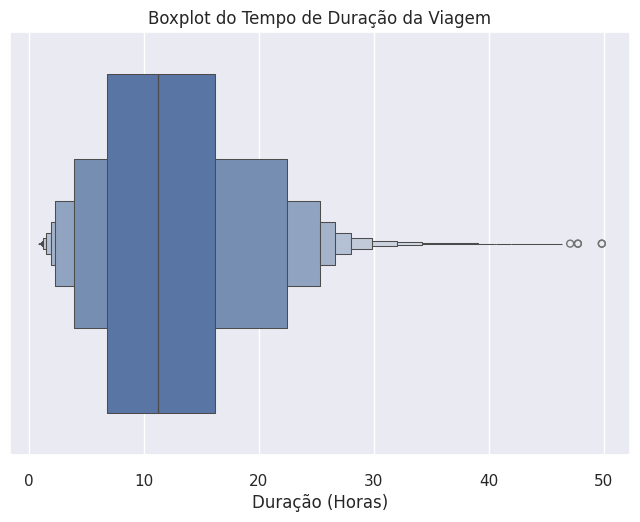

In [ ]:
# --------------------
# Boxplot da duração da viagem
sns.set_theme()
sns.boxenplot(df, x='Duração (Horas)')
plt.title('Boxplot do Tempo de Duração da Viagem')
plt.show()
# --------------------

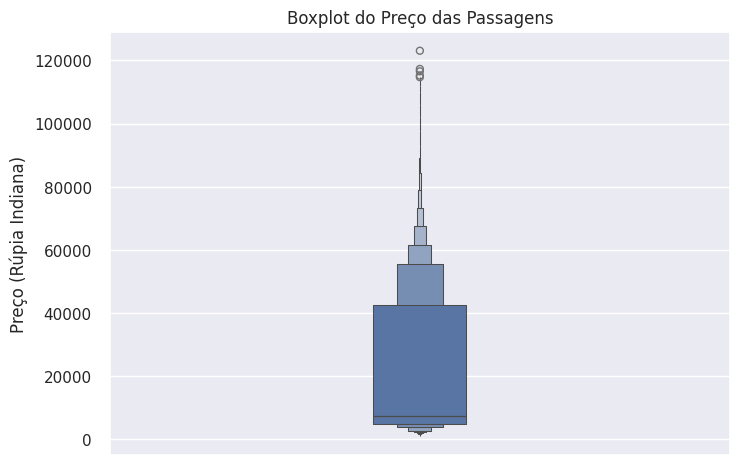

In [ ]:
# --------------------
# Boxplot do preço das passagens
sns.boxenplot(df, y='Preço (Rúpia Indiana)', orient='v', width = 0.15)
plt.title('Boxplot do Preço das Passagens')
plt.show()
# --------------------

Observa-se uma alta quantidade de outliers no preço da passagem e na duração do tempo de voo, sendo necessário fazer a retirada dos mesmos.

In [ ]:
df[['Duração (Horas)', 'Preço (Rúpia Indiana)']].describe()

,Duração (Horas),Preço (Rúpia Indiana)
count,300153.000000,300153.000000
mean,12.221021,20889.660523
std,7.191997,22697.767366
min,0.830000,1105.000000
25%,6.830000,4783.000000
50%,11.250000,7425.000000
75%,16.170000,42521.000000
max,49.830000,123071.000000


In [ ]:
# --------------------
Q1 = df['Duração (Horas)'].quantile(0.25)
Q3 = df['Duração (Horas)'].quantile(0.75)
# Calculando o IQR da Duração
IQR_duracao = Q3 - Q1
# Calculando superior para a Duração
limite_superior_duracao = Q3 + 1.5 * IQR_duracao
# --------------------
Q1 = df['Preço (Rúpia Indiana)'].quantile(0.25)
Q3 = df['Preço (Rúpia Indiana)'].quantile(0.75)
# Calculando o IQR do Preço
IQR_preco = Q3 - Q1
# Calculando superior para o Preço
limite_superior_preco = Q3 + 1.5 * IQR_preco
# --------------------

In [ ]:
df_filtrado = df[(df['Preço (Rúpia Indiana)'] <= limite_superior_preco) &
                 (df['Duração (Horas)'] <= limite_superior_duracao)]

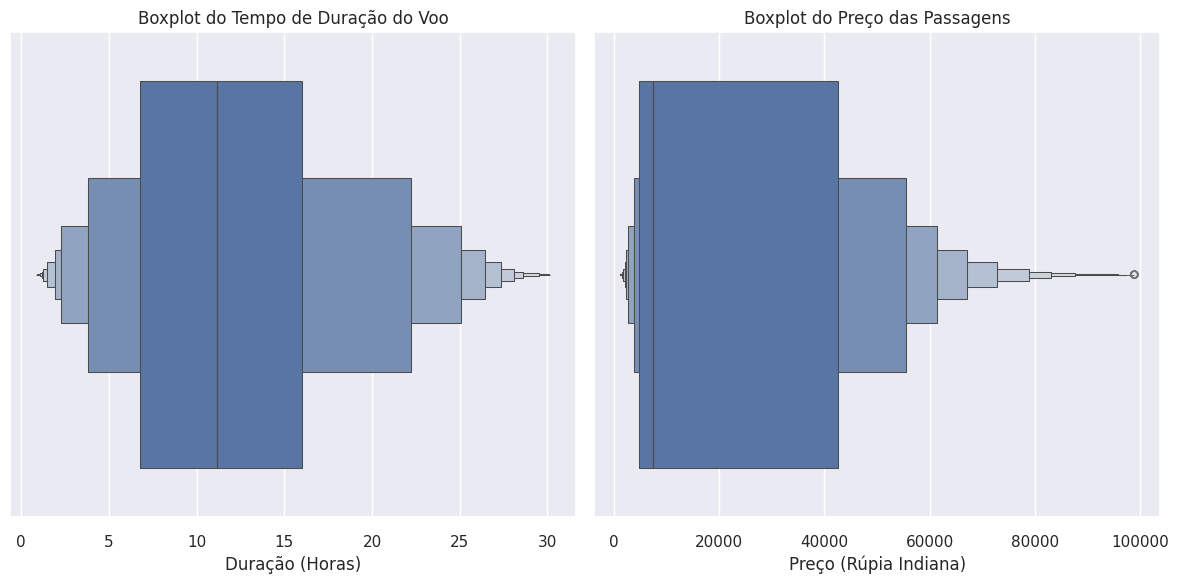

In [ ]:
# --------------------
# Boxplot das variáveis filtradas
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxenplot(x='Duração (Horas)', data=df_filtrado, ax=axes[0])
axes[0].set_title('Boxplot do Tempo de Duração do Voo')

sns.boxenplot(x='Preço (Rúpia Indiana)', data=df_filtrado, ax=axes[1])
axes[1].set_title('Boxplot do Preço das Passagens')
plt.tight_layout()
# --------------------

# Aprendizado de Máquina

## Árvore de Regressão

In [ ]:
# --------------------
# Considerando um subset do data.frame
# Considera n linhas escolhidas aleatoriamente
diamond = df.sample(n=10000)

In [ ]:
# --------------------
# Verificando se os dados foram carregados corretamente
diamond.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 289958 to 137207
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Companhia Aérea                 10000 non-null  object 
 1   Voo                             10000 non-null  object 
 2   Cidade de Origem                10000 non-null  object 
 3   Horário de Partida              10000 non-null  object 
 4   Paradas                         10000 non-null  object 
 5   Horário de Chegada              10000 non-null  object 
 6   Cidade Destino                  10000 non-null  object 
 7   Classe                          10000 non-null  object 
 8   Duração (Horas)                 10000 non-null  float64
 9   Antecedência da Reserva (Dias)  10000 non-null  int64  
 10  Preço (Rúpia Indiana)           10000 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 937.5+ KB


In [ ]:
# --------------------
# Separando aleatoriamente dados para treino e teste
# teste = .3
# treino = .7
diamond_train, diamond_test = train_test_split(diamond,test_size=.3, random_state=123)

In [ ]:
# --------------------
# Verificando se os dados foram separados corretamente
diamond_train.head()

,Companhia Aérea,Voo,Cidade de Origem,Horário de Partida,Paradas,Horário de Chegada,Cidade Destino,Classe,Duração (Horas),Antecedência da Reserva (Dias),Preço (Rúpia Indiana)
26036,AirAsia,I5-740,Delhi,3h~6h,Duas ou Mais,21h~0h,Kolkata,Econômica,13.08,35,2480
90303,Go First,G8-395,Bangalore,6h~12h,Uma,18h~21h,Delhi,Econômica,8.42,32,4028
47159,Vistara,UK-910,Mumbai,18h~21h,Nenhuma,18h~21h,Delhi,Econômica,2.17,23,3024
79884,IndiGo,6E-5398,Mumbai,6h~12h,Uma,18h~21h,Chennai,Econômica,8.00,20,5052
141667,IndiGo,6E-6488,Kolkata,6h~12h,Uma,21h~0h,Bangalore,Econômica,11.17,44,4944


In [ ]:
# --------------------
# Iniciando configurações do modelo de Árvore de Regressão
# session_id = 12345 # Para reprodutibilidade
arvore_setup = setup(data = diamond_train, target = 'Preço (Rúpia Indiana)', session_id = 12345)

,Description,Value
0,Session id,12345
1,Target,Preço (Rúpia Indiana)
2,Target type,Regression
3,Original data shape,"(7000, 11)"
4,Transformed data shape,"(7000, 38)"
5,Transformed train set shape,"(4900, 38)"
6,Transformed test set shape,"(2100, 38)"
7,Numeric features,2
8,Categorical features,8
9,Preprocess,True


In [ ]:
# --------------------
# Verificando o modelo que irá ser usado
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
# Criando modelo de Árvore de Regressão (Decision Tree Regressor)
# max_depth ->  profundidade máxima da árvore
# fold      ->  número de 'dobras' para validação cruzada
regression_tree_model = create_model('dt', max_depth = 10, fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3214.6303,34993833.4021,5915.5586,0.9344,0.2896,0.2287
1,2910.4264,24433408.8895,4943.0162,0.9544,0.2676,0.2046
2,3418.7333,37274417.7177,6105.2779,0.9281,0.3033,0.2437
3,2916.7178,23802641.5476,4878.7951,0.9551,0.2828,0.2206
4,2903.0814,28772966.8865,5364.0439,0.9405,0.2588,0.1954
5,2773.1926,24087444.6363,4907.8962,0.9525,0.2731,0.1967
6,3342.9358,33391145.0509,5778.5072,0.9349,0.3133,0.2507
7,2862.4656,25266525.8368,5026.5819,0.9484,0.3129,0.2362
8,2547.0152,21080439.0094,4591.3439,0.9552,0.2954,0.2284


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

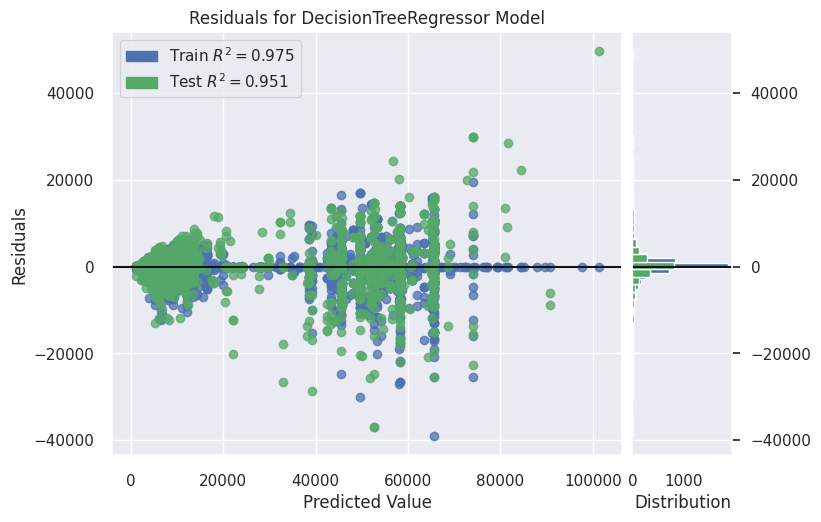

In [ ]:
# --------------------
# Visualização dos resíduos
plot_model(regression_tree_model, plot='residuals')

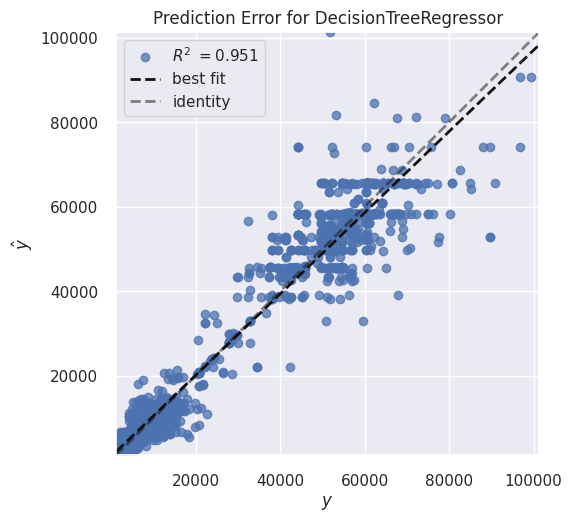

In [ ]:
# --------------------
# Construindo gráfico de erro
plot_model(regression_tree_model, plot = 'error')

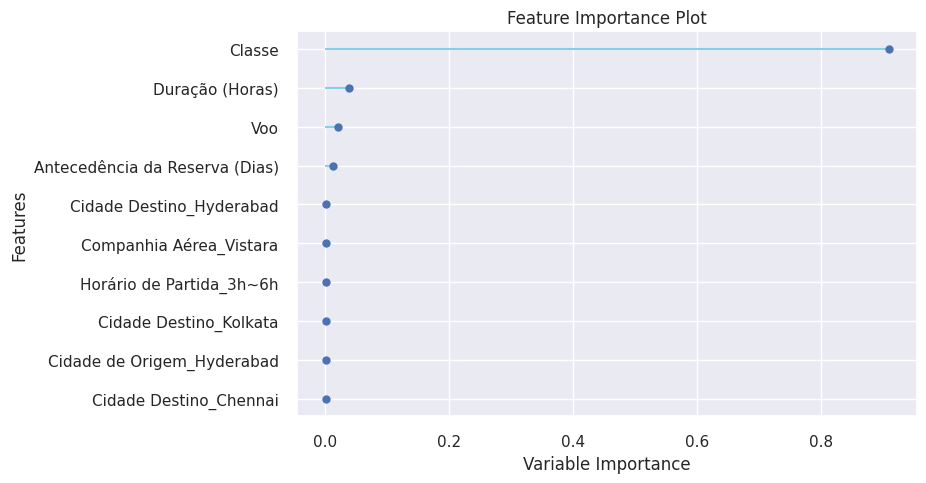

In [ ]:
# --------------------
# Verificando a importância de cada variável segundo o algoritmo
plot_model(regression_tree_model, plot = 'feature')

In [ ]:
# --------------------
# Fazendo predução do modelo
predict_model(regression_tree_model, data = diamond_test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,2918.1616,26928224.7108,5189.2412,0.9482,0.2764,0.2101


,Companhia Aérea,Voo,Cidade de Origem,Horário de Partida,Paradas,Horário de Chegada,Cidade Destino,Classe,Duração (Horas),Antecedência da Reserva (Dias),Preço (Rúpia Indiana),prediction_label
225442,Air India,AI-639,Mumbai,6h~12h,Uma,21h~0h,Delhi,Executiva,14.42,6,53152,52059.433333
13803,AirAsia,I5-711,Delhi,3h~6h,Uma,12h~18h,Bangalore,Econômica,7.42,21,3090,3408.352941
172998,Vistara,UK-880,Hyderabad,12h~18h,Uma,6h~12h,Kolkata,Econômica,19.17,22,5960,6741.114035
271950,Vistara,UK-776,Kolkata,18h~21h,Uma,21h~0h,Hyderabad,Executiva,27.33,37,49207,52623.000000
273505,Vistara,UK-776,Kolkata,18h~21h,Uma,18h~21h,Chennai,Executiva,26.33,22,55502,58176.410526
...,...,...,...,...,...,...,...,...,...,...,...,...
105030,Air India,AI-804,Bangalore,3h~6h,Uma,12h~18h,Kolkata,Econômica,8.33,18,6584,6532.932773
123186,Go First,G8-512,Kolkata,3h~6h,Uma,18h~21h,Delhi,Econômica,11.67,24,6324,5637.901961
221885,Vistara,UK-833,Delhi,3h~6h,Nenhuma,6h~12h,Chennai,Executiva,2.75,2,31896,27864.000000
260896,Vistara,UK-810,Bangalore,3h~6h,Uma,21h~0h,Chennai,Executiva,13.25,42,60396,60966.818182


In [ ]:
# --------------------
# Otimizando o modelo
tuned_dt = tune_model(regression_tree_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3008.9003,33345048.3312,5774.5172,0.9375,0.2902,0.2206
1,2823.2700,21742407.9383,4662.8755,0.9594,0.2858,0.2076
2,3139.7378,33558882.9065,5793.0029,0.9352,0.2931,0.2257
3,2908.4445,25098097.0005,5009.8001,0.9526,0.2879,0.2201
4,3208.6494,36961388.0640,6079.5878,0.9235,0.2930,0.2199
5,2611.3983,21053864.0779,4588.4490,0.9584,0.2859,0.2107
6,3178.2113,30875475.5197,5556.5705,0.9398,0.3079,0.2358
7,2970.6036,30922964.1738,5560.8420,0.9368,0.3061,0.2322
8,2505.5482,19888238.3500,4459.6231,0.9577,0.3080,0.2309


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


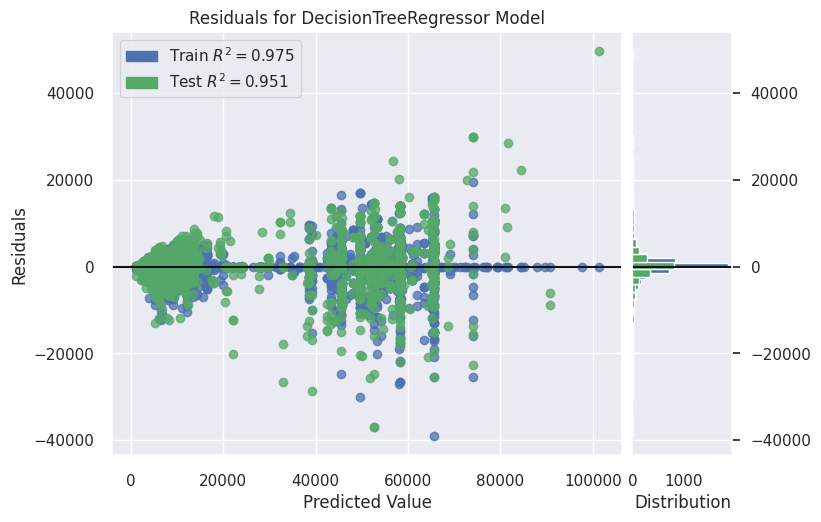

In [ ]:
# Gráfico de resíduos para o modelo otimizado
plot_model(tuned_dt, plot = 'residuals')

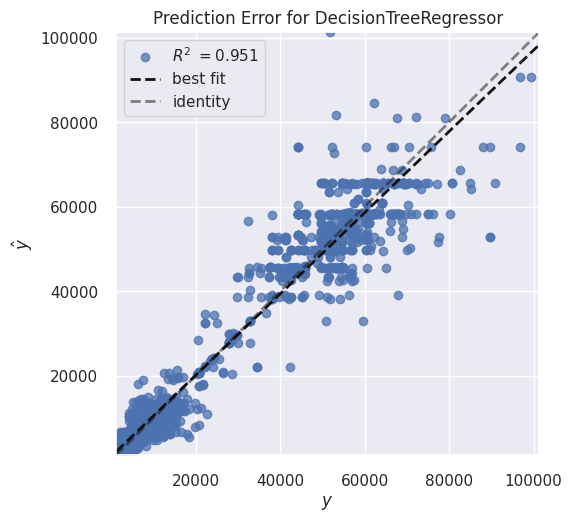

In [ ]:
# Gráfico do erro do modelo otimizado
plot_model(tuned_dt, plot = 'error')

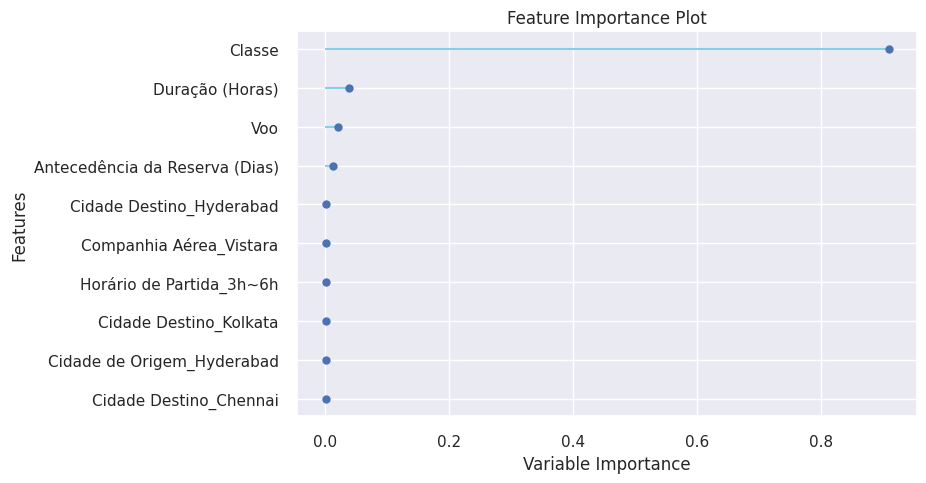

In [ ]:
# --------------------
# Verificando a importância de cada variável segundo o algoritmo após otimização
plot_model(tuned_dt, plot = 'feature')

In [ ]:
# --------------------
# Fazendo predução do modelo otimizado
rt_testing_pred = predict_model(tuned_dt, data = diamond_test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,2918.1616,26928224.7108,5189.2412,0.9482,0.2764,0.2101


In [ ]:
rt_testing_pred.head()

,Companhia Aérea,Voo,Cidade de Origem,Horário de Partida,Paradas,Horário de Chegada,Cidade Destino,Classe,Duração (Horas),Antecedência da Reserva (Dias),Preço (Rúpia Indiana),prediction_label
225442,Air India,AI-639,Mumbai,6h~12h,Uma,21h~0h,Delhi,Executiva,14.42,6,53152,52059.433333
13803,AirAsia,I5-711,Delhi,3h~6h,Uma,12h~18h,Bangalore,Econômica,7.42,21,3090,3408.352941
172998,Vistara,UK-880,Hyderabad,12h~18h,Uma,6h~12h,Kolkata,Econômica,19.17,22,5960,6741.114035
271950,Vistara,UK-776,Kolkata,18h~21h,Uma,21h~0h,Hyderabad,Executiva,27.33,37,49207,52623.000000
273505,Vistara,UK-776,Kolkata,18h~21h,Uma,18h~21h,Chennai,Executiva,26.33,22,55502,58176.410526


In [ ]:
# --------------------
# Selecionando todos os dados filtrados
diamond_f = df_filtrado
# --------------------
# Separando aleatoriamente dados para treino e teste
# teste = .3
# treino = .7
diamond_ftrain, diamond_ftest = train_test_split(diamond_f,test_size=.3, random_state=123)

In [ ]:
diamond_ftrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208544 entries, 103449 to 251301
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Companhia Aérea                 208544 non-null  object 
 1   Voo                             208544 non-null  object 
 2   Cidade de Origem                208544 non-null  object 
 3   Horário de Partida              208544 non-null  object 
 4   Paradas                         208544 non-null  object 
 5   Horário de Chegada              208544 non-null  object 
 6   Cidade Destino                  208544 non-null  object 
 7   Classe                          208544 non-null  object 
 8   Duração (Horas)                 208544 non-null  float64
 9   Antecedência da Reserva (Dias)  208544 non-null  int64  
 10  Preço (Rúpia Indiana)           208544 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 19.1+ MB


In [ ]:
# --------------------
# Iniciando configurações do modelo de Árvore de Regressão
# session_id = 12345 # Para reprodutibilidade
arvore_setup = setup(data = diamond_ftrain, target = 'Preço (Rúpia Indiana)', session_id = 12345)

,Description,Value
0,Session id,12345
1,Target,Preço (Rúpia Indiana)
2,Target type,Regression
3,Original data shape,"(208544, 11)"
4,Transformed data shape,"(208544, 38)"
5,Transformed train set shape,"(145980, 38)"
6,Transformed test set shape,"(62564, 38)"
7,Numeric features,2
8,Categorical features,8
9,Preprocess,True


In [ ]:
# Criando modelo de Árvore de Regressão (Decision Tree Regressor)
# max_depth ->  profundidade máxima da árvore
# fold      ->  número de 'dobras' para validação cruzada
regression_tree_model = create_model('dt', max_depth = 20, fold = 20)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1198.7254,10115867.7775,3180.5452,0.9809,0.1723,0.0843
1,1175.8086,8992206.4402,2998.7008,0.9827,0.1716,0.0877
2,1157.4014,9549340.8082,3090.2008,0.9816,0.1734,0.0863
3,1161.2364,8872395.6543,2978.6567,0.9827,0.1742,0.0893
4,1130.8029,8540796.8458,2922.4642,0.9834,0.1711,0.0843
5,1145.4546,8795297.9639,2965.6868,0.9826,0.1712,0.0874
6,1127.6874,8092328.8761,2844.7019,0.9843,0.1723,0.0886
7,1175.9286,8525043.7424,2919.7678,0.9832,0.1824,0.0926
8,1170.4658,9574260.7382,3094.2302,0.9812,0.1780,0.0858


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

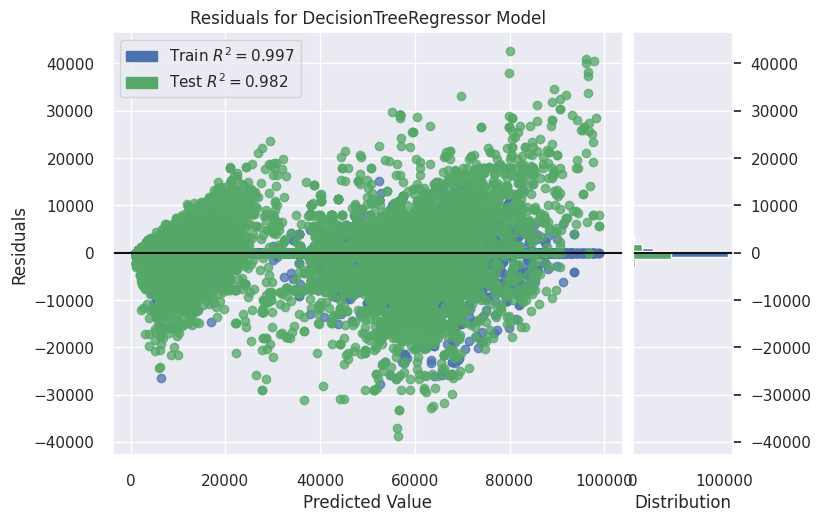

In [ ]:
# --------------------
# Visualização dos resíduos
plot_model(regression_tree_model, plot = 'residuals')

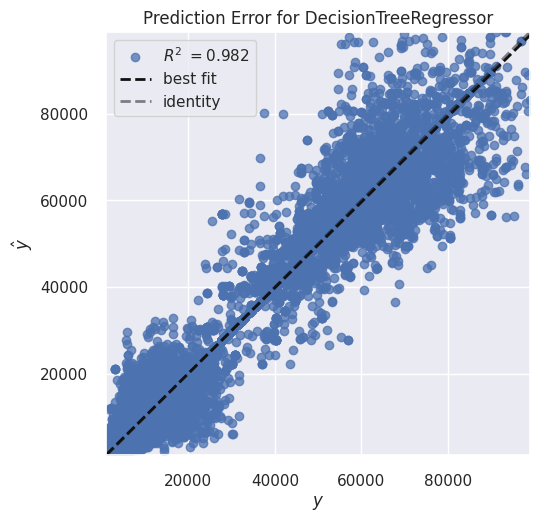

In [ ]:
# --------------------
# Construindo gráfico de erro
plot_model(regression_tree_model, plot = 'error')

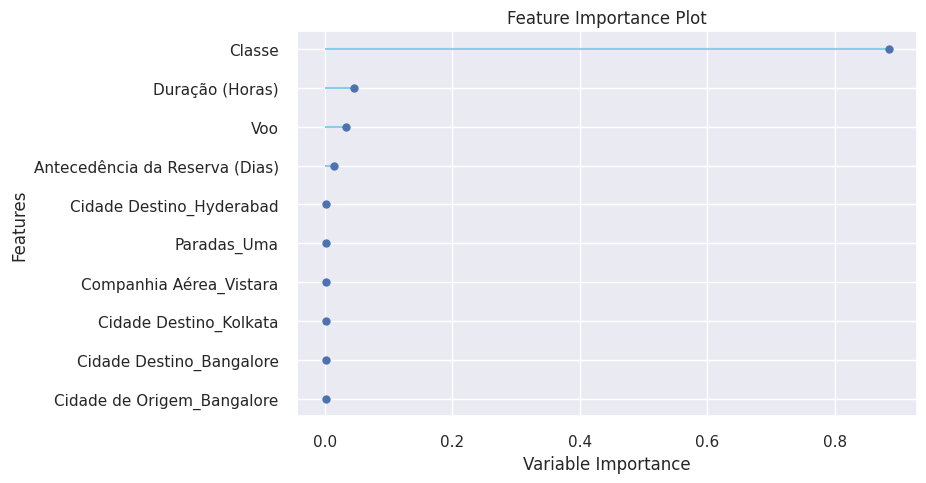

In [ ]:
# --------------------
# Verificando a importância de cada variável segundo o algoritmo
plot_model(regression_tree_model, plot = 'feature')

In [ ]:
# --------------------
# Fazendo predução do modelo
predict_model(regression_tree_model, data = diamond_test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,818.2130,5240638.3188,2289.2440,0.9899,0.1502,0.0700


,Companhia Aérea,Voo,Cidade de Origem,Horário de Partida,Paradas,Horário de Chegada,Cidade Destino,Classe,Duração (Horas),Antecedência da Reserva (Dias),Preço (Rúpia Indiana),prediction_label
225442,Air India,AI-639,Mumbai,6h~12h,Uma,21h~0h,Delhi,Executiva,14.42,6,53152,53152.000000
13803,AirAsia,I5-711,Delhi,3h~6h,Uma,12h~18h,Bangalore,Econômica,7.42,21,3090,3090.000000
172998,Vistara,UK-880,Hyderabad,12h~18h,Uma,6h~12h,Kolkata,Econômica,19.17,22,5960,5983.207612
271950,Vistara,UK-776,Kolkata,18h~21h,Uma,21h~0h,Hyderabad,Executiva,27.33,37,49207,49207.000000
273505,Vistara,UK-776,Kolkata,18h~21h,Uma,18h~21h,Chennai,Executiva,26.33,22,55502,55502.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
105030,Air India,AI-804,Bangalore,3h~6h,Uma,12h~18h,Kolkata,Econômica,8.33,18,6584,8198.000000
123186,Go First,G8-512,Kolkata,3h~6h,Uma,18h~21h,Delhi,Econômica,11.67,24,6324,6324.000000
221885,Vistara,UK-833,Delhi,3h~6h,Nenhuma,6h~12h,Chennai,Executiva,2.75,2,31896,56950.000000
260896,Vistara,UK-810,Bangalore,3h~6h,Uma,21h~0h,Chennai,Executiva,13.25,42,60396,60396.000000


## Floresta Aleatória para Regressão

In [ ]:
# Considerando um subset do data.frame
# Considera n linhas escolhidas aleatoriamente
diamond_flo = df.sample(n=10000)

In [ ]:
# Dividindo em treino e teste
diamond_flotrain, diamond_flotest = train_test_split(diamond_flo,test_size=.3, random_state=123)

In [ ]:
# Iniciando  a configuração do modelo
# session_id = 12345  # Para reprodutibilidade
arvore_setup = setup(data = diamond_flotrain, target = 'Preço (Rúpia Indiana)', session_id = 12345)

,Description,Value
0,Session id,12345
1,Target,Preço (Rúpia Indiana)
2,Target type,Regression
3,Original data shape,"(7000, 11)"
4,Transformed data shape,"(7000, 38)"
5,Transformed train set shape,"(4900, 38)"
6,Transformed test set shape,"(2100, 38)"
7,Numeric features,2
8,Categorical features,8
9,Preprocess,True


In [ ]:
# Modelo que irá ser usado
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
#Criação do modelo de Floresta aleatória para regressão (random Forest para Regressão)
#
regression_rf_model = create_model('rf', n_estimators = 100, max_depth = 10, fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2452.9825,18069359.9917,4250.8070,0.9671,0.2397,0.1885
1,2750.7994,22693914.9219,4763.8131,0.9568,0.2659,0.2051
2,2625.0210,21756212.1382,4664.3555,0.9584,0.2458,0.1959
3,2384.6369,13555774.6383,3681.8168,0.9707,0.2561,0.1994
4,2645.5288,20020895.0863,4474.4715,0.9629,0.2499,0.1990
5,2901.4083,27918430.8221,5283.7894,0.9474,0.2628,0.1949
6,2534.7035,17855962.9513,4225.6317,0.9638,0.2530,0.1950
7,2804.6954,24116940.6175,4910.9002,0.9558,0.2551,0.1930
8,2687.5256,22095881.6648,4700.6257,0.9563,0.2603,0.1993


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

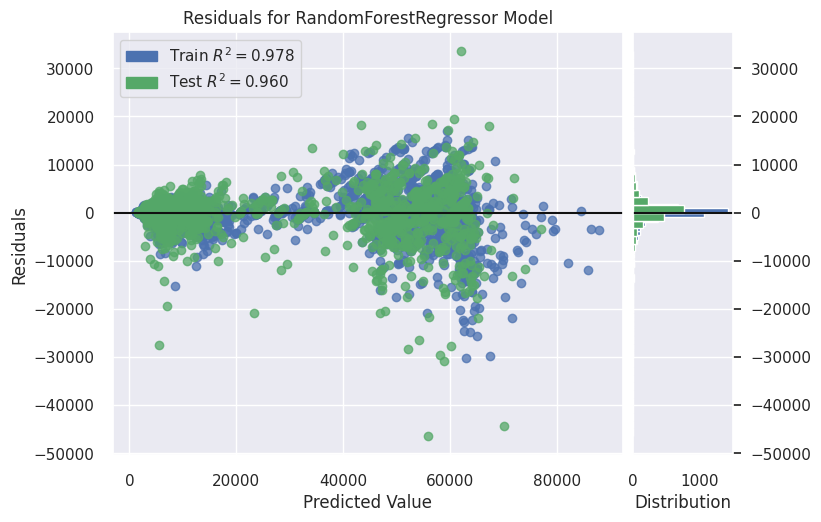

In [ ]:
# Visualizando em forma de Gráfico - Plot dos resíduos
plot_model(regression_rf_model, plot = 'residuals')

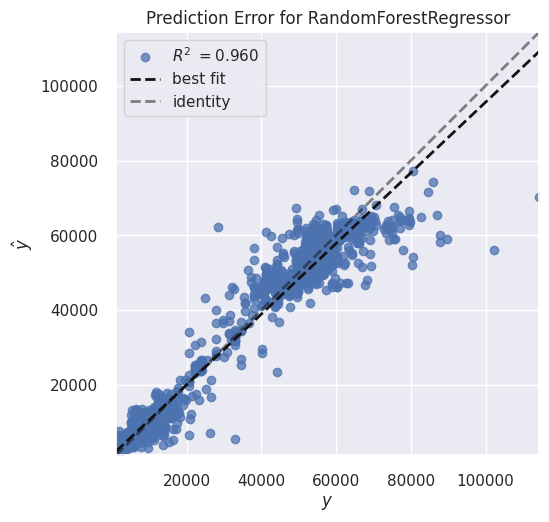

In [ ]:
# plot do erro
plot_model(regression_rf_model, plot = 'error')

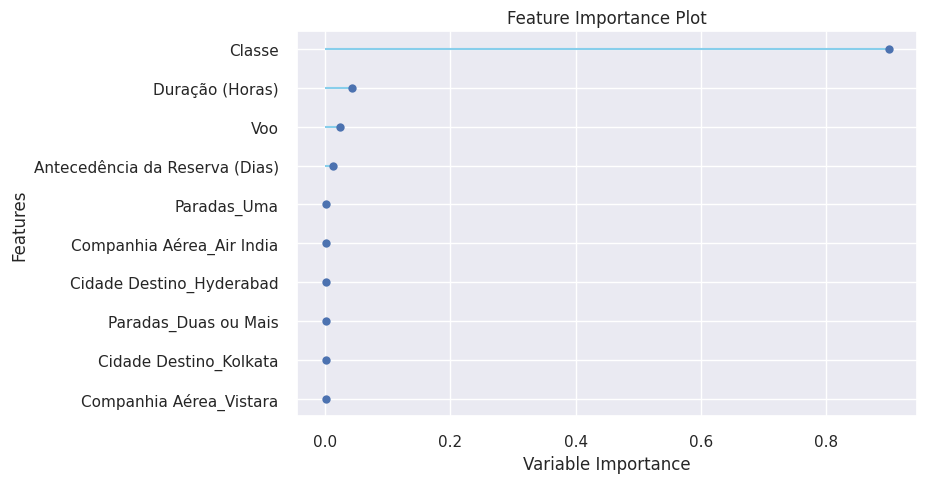

In [ ]:
# plot da importância das variáveis
plot_model(regression_rf_model, plot = 'feature')

In [ ]:
# Fazendo predição do modelo
rt_testing_pred = predict_model(regression_rf_model, data = diamond_flotest)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,2495.8712,19995303.2240,4471.6108,0.9608,0.2496,0.1903


### Processo demorado para Fazer o Tunning da Floresta Aleatória para regressão

In [ ]:
# Otimizar o modelo
tuned_dt = tune_model(regression_rf_model, n_iter = 2, optimize = 'MSE' )

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3367.6622,27875307.4383,5279.7071,0.9492,0.3106,0.2606
1,3535.7448,34905434.8603,5908.0822,0.9336,0.3538,0.3065
2,3400.6988,31336332.6717,5597.8864,0.9401,0.3347,0.2908
3,3038.3793,22547504.0858,4748.4212,0.9512,0.3380,0.2815
4,3504.8926,33006329.0538,5745.1135,0.9388,0.3563,0.3075
5,3972.8036,43338186.4576,6583.1745,0.9184,0.3459,0.2895
6,3600.7093,39108043.5977,6253.6424,0.9208,0.3465,0.2927
7,3577.7996,36273921.7058,6022.7836,0.9336,0.3209,0.2662
8,3438.0047,31433970.3602,5606.6006,0.9378,0.3475,0.2919


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


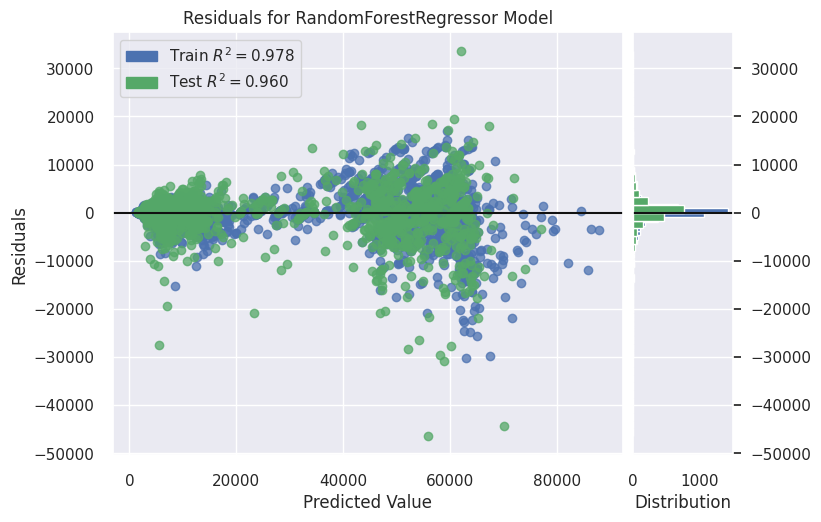

In [ ]:
# Visualizando em forma de Gráfico- Plot dos resíduos
plot_model(tuned_dt, plot = 'residuals')

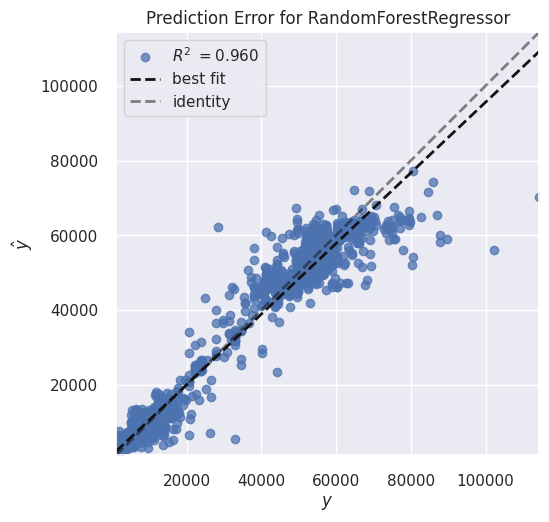

In [ ]:
# plot do erro
plot_model(tuned_dt, plot = 'error')

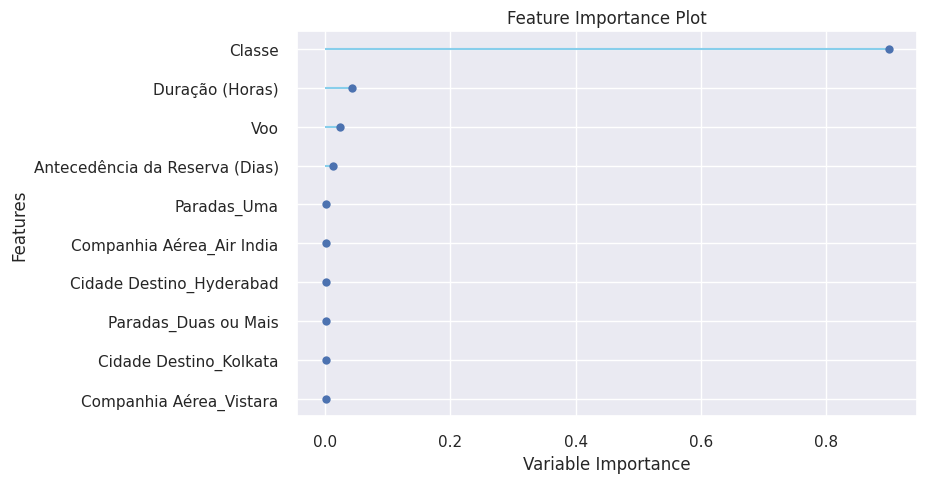

In [ ]:
# plot da importância das variáveis
plot_model(tuned_dt, plot = 'feature')

In [ ]:
# Fazendo predição do modelo
rt_testing_pred = predict_model(tuned_dt, data = diamond_flotest)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,2495.8712,19995303.2240,4471.6108,0.9608,0.2496,0.1903
